# Introduction

In this notebook we'll run the same quantum circuit using 5 different quantum programming packages:

- [Project Q](#Project-Q)
- [Qiskit](#Qiskit)
- [Quil](#Quil)
- [Cirq](#Cirq)
- [Q#](#Q$\#$)

In [8]:
import numpy as np

# Project Q

In [9]:
from projectq import MainEngine
from projectq.ops import H, Measure

eng = MainEngine()
qubit = eng.allocate_qubit()

H | qubit
Measure | qubit

eng.flush()
print("Measured {}".format(int(qubit)))

Measured 1


# Qiskit

In [29]:
from qiskit import BasicAer
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute

In [30]:
# set up Quantum Register and Classical Register for 3 qubits
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)

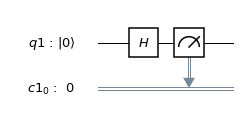

In [31]:
qc.draw(output='mpl')

In [43]:
job = execute(qc, backend=BasicAer.get_backend('qasm_simulator'), shots=1000)
result = job.result()
result

Result(backend_name='qasm_simulator', backend_version='2.0.0', header=Obj(backend_name='qasm_simulator'), job_id='78fe6def-02ad-42db-bfb4-3ab4b6663959', qobj_id='fc824c26-2317-4b22-b32d-4d96b124b03e', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=486, 0x1=514)), header=Obj(clbit_labels=[['c1', 0]], compiled_circuit_qasm='OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q1[1];\ncreg c1[1];\nu2(0,pi) q1[0];\nmeasure q1[0] -> c1[0];\n', creg_sizes=[['c1', 1]], memory_slots=1, n_qubits=1, name='circuit3', qreg_sizes=[['q1', 1]], qubit_labels=[['q1', 0]]), name='circuit3', seed=505415823, shots=1000, status='DONE', success=True, time_taken=0.0047969818115234375)], status='COMPLETED', success=True, time_taken=0.00499272346496582)

In [44]:
result.get_counts(qc)

{'1': 514, '0': 486}

Get quantum wavefunction

In [45]:
job = execute(qc, backend=BasicAer.get_backend('statevector_simulator'))
result = job.result()
result.get_statevector()

array([0.70710678+0.j, 0.70710678+0.j])

# Quil

In [9]:
from pyquil.api import QVMConnection
from pyquil.quil import Program, Declare
from pyquil.gates import X, MEASURE, RX, H
import subprocess

# Start the Lisp server in a subprocess
qvm_server = subprocess.Popen(["/src/qvm/qvm", "-S"])
qvm = QVMConnection()

In [12]:
program = Program()
ro = program.declare('ro', 'BIT')
program += H(0)

In [13]:
result = qvm.run(program + MEASURE(0, ro[0]), trials=1000)
result

[[1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0]

In [14]:
np.array(result).T[0].sum()

465

In [15]:
wf = qvm.wavefunction(program)
wf.amplitudes

array([0.70710678+0.j, 0.70710678+0.j])

Stop the Lisp server

In [16]:
qvm_server.terminate()

# Cirq

In [2]:
import cirq
simulator = cirq.Simulator()

qubit = cirq.GridQubit(0, 0)
circuit = cirq.Circuit.from_ops(
    cirq.H(qubit),
    cirq.measure(qubit, key='m')
)

In [3]:
print(circuit)

(0, 0): ───H───M('m')───


In [4]:
result = simulator.run(circuit, repetitions=1000)

In [5]:
result

m=11001010010000110100100111110011000101000101111111010000010101010111110010110000101110110100100101111011010001011010111011011001100001110010000001001100101111111100100001000111001110001011001000010111000000011000110111111111111001111101010010100010111110011011011111101111010000001001010001000010100111101110101000101001000011001111001100011011110000111000110110111001001100110100110110100000110011011110111111000011001100011010110001011101001110010100110011010010011001011111110000001101111010101100011000100000100101100111111011011000001000010001110110011101100100010100100000101100100001101000100110011100101010011001011101011111001001111110010111010101101100001100010111110100010101001000111011001000100100001010101001000001000100010001110101101101111001110011011011010111111010100011100111001001111101000011000001101101001111100111001011010110100100110011001000100000110000010111101000100101111000001100110111110111110101101101010000010101000110010010011010010110010000010010100110110010111001

In [7]:
result.measurements["m"]

array([[ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [

In [26]:
np.array(result.measurements["m"]).T.sum()

466

# Q$\#$

Make sure to change the kernel to Q# before running this part.

In [1]:
open Microsoft.Quantum.Extensions.Diagnostics; // import the DumpMachine function

operation Hadamard(count: Int) : ( Result[], Int )
    {
        mutable r = Zero;
        mutable numOnes = 0;
        mutable results = new Result[0];

        using (qubits = Qubit[1]) {
            for (test in 1..count)
            {
                H(qubits[0]);

                if (test == 1)
                {
                    DumpMachine(); // Show the current waveform
                }

                set r = M (qubits[0]);

                // Add to the results
                set results = results + [r];

                // Count the number of ones we saw:
                if (r == One)
                {
                    set numOnes = numOnes + 1;
                }

                ResetAll(qubits);
            }
        }

        return (results, numOnes);
    }

Hadamard

In [2]:
operation HadamardRuns() : ( Result[], Int ) {
    let count = 10;
    return Hadamard(count);
}

HadamardRuns

In [10]:
%simulate HadamardRuns

# wave function for qubits with ids (least to most significant): 0
0:	0.707106781186548	0
1:	0.707106781186548	0


([Zero;One;Zero;One;Zero;Zero;Zero;One;Zero;One], 4)